## Importar datos

In [1]:
import datetime as dt
import pandas as pd
import numpy as np

Como ejemplo, vamos a importar unos datos que tenemos en CSV con precios de alquileres en los distritos de Madrid, y mostraremos sus 5 primeras filas.
Llamaremos a este dataframe 'alquiler'.
El fichero se encuentra en la carpeta 'dat' y se llama 'alquiler-madrid-distritos.csv':

In [2]:
path = "C:/Users/Usuario/Desktop/Digital Transformation/Notebooks/04 - Pandas/dat/alquiler-madrid-distritos.csv" # Forma larga.
path = 'dat/alquiler-madrid-distritos.csv' # Forma resumida. Usamos esta, aunque podríamos usar la otra también.

alquiler = pd.read_csv(path)

alquiler.head()

,distrito,ano,quarter,precio
0,Arganzuela,2007,2,13.066587
1,Barajas,2007,2,11.199855
2,Carabanchel,2007,2,11.127661
3,Centro,2007,2,17.746404
4,Chamartín,2007,2,14.386480


## Inspeccionar el dataframe

Las tablas en `pandas` son objetos de la clase `DataFrames`. Un `DataFrame` consta de dos partes: un índice y los datos propiamente dichos. Las columnas de los datos son de la clase `Series`.

Consulta el nombre de las columnas de tu dataframe y sus tipos.

In [11]:
alquiler.columns

Index(['distrito', 'ano', 'quarter', 'precio'], dtype='object')

In [12]:
alquiler.dtypes

distrito     object
ano           int64
quarter       int64
precio      float64
dtype: object

Consulta el índice de tu dataframe

In [21]:
alquiler.index

RangeIndex(start=0, stop=840, step=1)

Consulta cuántas filas y columnas tiene tu dataframe

In [32]:
alquiler.shape

(840, 4)

In [33]:
alquiler.shape[0]

840

In [35]:
len(alquiler)

840

In [34]:
alquiler.shape[1]

4

In [38]:
alquiler.info

<bound method DataFrame.info of               distrito   ano  quarter     precio
0           Arganzuela  2007        2  13.066587
1              Barajas  2007        2  11.199855
2          Carabanchel  2007        2  11.127661
3               Centro  2007        2  17.746404
4            Chamartín  2007        2  14.386480
..                 ...   ...      ...        ...
835             Tetuan  2018        2  15.114558
836              Usera  2018        2  11.533458
837          Vicálvaro  2018        2   9.962139
838  Villa De Vallecas  2018        2  10.915967
839         Villaverde  2018        2  10.427527

[840 rows x 4 columns]>

In [40]:
alquiler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distrito  840 non-null    object 
 1   ano       840 non-null    int64  
 2   quarter   840 non-null    int64  
 3   precio    840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [39]:
len(alquiler.columns)

4

## Filtro y selección

Hay tres operadores fundamentales para seleccionar filas y columnas: `loc`, `iloc` y `[]`. La diferencia fundamental entre `loc` e `iloc` es que el primero requiere _etiquetas_ y el segundo, índices numéricos (la `i` inicial viene de `integer`).

* Selecciona usando `iloc` la fila 200.
* Selecciona usando `iloc` un subconjunto de datos con las filas de la 10 a la 20 y todas las columnas salvo la primera
* Selecciona usando `iloc` cuatro filas cualesquiera no consecutivas y dos columnas cualesquiera no consecutivas

In [14]:
alquiler.iloc[200,]

distrito    Moratalaz
ano              2010
quarter             4
precio        9.90141
Name: 200, dtype: object

In [15]:
alquiler.iloc[10:21,1:]

,ano,quarter,precio
10,2007,2,13.241545
11,2007,2,11.498611
12,2007,2,11.691376
13,2007,2,13.747522
14,2007,2,15.475158
15,2007,2,11.834774
16,2007,2,12.428231
17,2007,2,11.014235
18,2007,2,9.592651
19,2007,2,10.315717


In [16]:
alquiler.iloc[[0,3,8,13], [0,3]]

,distrito,precio
0,Arganzuela,13.066587
3,Centro,17.746404
8,Hortaleza,12.520535
13,Retiro,13.747522


* Selecciona usando `loc` el distrito de la fila 200
* Selecciona usando `loc` los precios de las filas de la 20 a la 30
* Selecciona usando `loc` las filas donde el distrito sea 'Retiro' para el año 2012
* Haz lo mimso que en el último punto sin usar `loc`

In [56]:
alquiler.loc[200]['distrito']

'Moratalaz'

In [57]:
alquiler.loc[200, 'distrito']

'Moratalaz'

In [17]:
alquiler.loc[200,['distrito']]

distrito    Moratalaz
Name: 200, dtype: object

In [15]:
alquiler.loc[20:30,['precio']]

,precio
20,10.303981
21,13.999737
22,11.958242
23,12.160093
24,18.044594
25,14.683947
26,16.098221
27,12.938475
28,10.937967
29,12.906404


Antes de seguir, obsérvese la diferencia entre poner el nombre de columna entre corchetes y no hacerlo:

In [16]:
alquiler.loc[20:30,'precio']

20    10.303981
21    13.999737
22    11.958242
23    12.160093
24    18.044594
25    14.683947
26    16.098221
27    12.938475
28    10.937967
29    12.906404
30    11.655067
Name: precio, dtype: float64

Sigamos pues:

In [79]:
type(alquiler.ano == 2012) 

pandas.core.series.Series

In [81]:
type(alquiler['ano'] == 2012) # Ambas expresiones son equivalentes.

pandas.core.series.Series

In [76]:

alquiler.loc[(alquiler['distrito'] == 'Retiro') & (alquiler.ano == 2012)]

,distrito,ano,quarter,precio
307,Retiro,2012,1,12.601891
328,Retiro,2012,2,12.363832
349,Retiro,2012,3,12.167435
370,Retiro,2012,4,11.951317


In [13]:
alquiler.loc[(alquiler['distrito'] == 'Retiro') & (alquiler['ano'] == 2012)] # Otra forma igual de válida.

,distrito,ano,quarter,precio
307,Retiro,2012,1,12.601891
328,Retiro,2012,2,12.363832
349,Retiro,2012,3,12.167435
370,Retiro,2012,4,11.951317


Otra forma, un pelín más complicada pero con el mismo resultado:

In [37]:
alquiler[(alquiler.loc[:, 'distrito'] == 'Retiro')&(alquiler.loc[:, 'ano'] == 2012)]

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter
307,Retiro,2012,1,12.601891,1134.170217,2012.Quarter:1
328,Retiro,2012,2,12.363832,1112.744890,2012.Quarter:2
349,Retiro,2012,3,12.167435,1095.069135,2012.Quarter:3
370,Retiro,2012,4,11.951317,1075.618564,2012.Quarter:4


Si les quitas los loc al primero también funciona:

In [20]:
alquiler[(alquiler['distrito'] == 'Retiro') & (alquiler['ano'] == 2012)]

,distrito,ano,quarter,precio
307,Retiro,2012,1,12.601891
328,Retiro,2012,2,12.363832
349,Retiro,2012,3,12.167435
370,Retiro,2012,4,11.951317


## Ordenación

Podemos ordenar un DataFrame por una o varias columnas, de forma ascendente o descendente, con [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

* Extrae de mayor a menor por precio las filas de la tabla para Tetuán a partir del año 2017
* Ordena el dataframe alfabéticamente por distrito y cronológicamente (de más antiguo a más reciente)

In [97]:
alquiler[(alquiler.distrito == 'Tetuan') & (alquiler.ano >= 2017)].sort_values('precio', ascending=False) # Versión óptima.

,distrito,ano,quarter,precio
793,Tetuan,2017,4,15.332326
835,Tetuan,2018,2,15.114558
814,Tetuan,2018,1,15.070236
772,Tetuan,2017,3,14.949865
730,Tetuan,2017,1,14.528777
751,Tetuan,2017,2,14.152455


In [40]:
alquiler.sort_values('precio', ascending = False)[(alquiler['ano'] >= 2017) & (alquiler['distrito'] == 'Tetuan')] # Versión lenta.

<ipython-input-40-9aaa6fcdc83d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alquiler.sort_values('precio', ascending = False)[(alquiler['ano'] >= 2017) & (alquiler['distrito'] == 'Tetuan')]


,distrito,ano,quarter,precio,precio_90_metros,ano_quarter
793,Tetuan,2017,4,15.332326,1379.909366,2017.Quarter:4
835,Tetuan,2018,2,15.114558,1360.310221,2018.Quarter:2
814,Tetuan,2018,1,15.070236,1356.321240,2018.Quarter:1
772,Tetuan,2017,3,14.949865,1345.487805,2017.Quarter:3
730,Tetuan,2017,1,14.528777,1307.589941,2017.Quarter:1
751,Tetuan,2017,2,14.152455,1273.720911,2017.Quarter:2


Otra forma, más eficiente pero menos legible (filtrar primero para no tener luego que ordenar todas las filas, sino solo las filtradas):

In [41]:
alquiler[(alquiler['ano'] >= 2017) & (alquiler['distrito'] == 'Tetuan')].sort_values('precio', ascending = False)

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter
793,Tetuan,2017,4,15.332326,1379.909366,2017.Quarter:4
835,Tetuan,2018,2,15.114558,1360.310221,2018.Quarter:2
814,Tetuan,2018,1,15.070236,1356.321240,2018.Quarter:1
772,Tetuan,2017,3,14.949865,1345.487805,2017.Quarter:3
730,Tetuan,2017,1,14.528777,1307.589941,2017.Quarter:1
751,Tetuan,2017,2,14.152455,1273.720911,2017.Quarter:2


In [102]:
alquiler.sort_values(['distrito', 'ano','quarter'], ascending= [5,3,1]) 
# Obsérvese que los nºs distintos de 0 son interpretados como True y 0 sería interpretado como False.

,distrito,ano,quarter,precio
0,Arganzuela,2007,2,13.066587
21,Arganzuela,2007,4,13.999737
42,Arganzuela,2008,2,13.567225
63,Arganzuela,2008,4,13.193953
84,Arganzuela,2009,2,12.710960
...,...,...,...,...
755,Villaverde,2017,2,9.537615
776,Villaverde,2017,3,9.980975
797,Villaverde,2017,4,10.296415
818,Villaverde,2018,1,10.230638


In [44]:
alquiler.sort_values(['distrito', 'ano','quarter'], ascending = [True, True, True]) # Modo clásico.

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter
0,Arganzuela,2007,2,13.066587,1175.992857,2007.Quarter:2
21,Arganzuela,2007,4,13.999737,1259.976356,2007.Quarter:4
42,Arganzuela,2008,2,13.567225,1221.050269,2008.Quarter:2
63,Arganzuela,2008,4,13.193953,1187.455765,2008.Quarter:4
84,Arganzuela,2009,2,12.710960,1143.986414,2009.Quarter:2
...,...,...,...,...,...,...
755,Villaverde,2017,2,9.537615,858.385308,2017.Quarter:2
776,Villaverde,2017,3,9.980975,898.287705,2017.Quarter:3
797,Villaverde,2017,4,10.296415,926.677319,2017.Quarter:4
818,Villaverde,2018,1,10.230638,920.757406,2018.Quarter:1


### Crear una columna calculada

Podemos operar sobre las columnas para crear otras nuevas.

* Calcula el precio de un piso de 90 m2 multipicando el valor del metro cuadrado ('precio') y guárdalo en una columna nueva llamada 'precio_90m'

In [124]:
alquiler['precio_90m'] = alquiler.precio * 90 # Forma fácil.
alquiler


pandas.core.frame.DataFrame

In [111]:
alquiler.loc[:,['precio']]

,precio
0,13.066587
1,11.199855
2,11.127661
3,17.746404
4,14.386480
...,...
835,15.114558
836,11.533458
837,9.962139
838,10.915967


In [23]:
alquiler['precio_90m']=alquiler.loc[:,['precio']]*90 # Forma un pelín más complicada, pero equivalente. Se trabaja con df direct.
alquiler

,distrito,ano,quarter,precio,precio_90m
0,Arganzuela,2007,2,13.066587,1175.992857
1,Barajas,2007,2,11.199855,1007.986923
2,Carabanchel,2007,2,11.127661,1001.489519
3,Centro,2007,2,17.746404,1597.176343
4,Chamartín,2007,2,14.386480,1294.783156
...,...,...,...,...,...
835,Tetuan,2018,2,15.114558,1360.310221
836,Usera,2018,2,11.533458,1038.011202
837,Vicálvaro,2018,2,9.962139,896.592543
838,Villa De Vallecas,2018,2,10.915967,982.437051


In [125]:
alquiler['precio_90m'] = pd.DataFrame(alquiler.precio * 90) # Esto sería la simple, pero trabajndo con df en lugar de pd.series.
alquiler

,distrito,ano,quarter,precio,precio_90m
0,Arganzuela,2007,2,13.066587,1175.992857
1,Barajas,2007,2,11.199855,1007.986923
2,Carabanchel,2007,2,11.127661,1001.489519
3,Centro,2007,2,17.746404,1597.176343
4,Chamartín,2007,2,14.386480,1294.783156
...,...,...,...,...,...
835,Tetuan,2018,2,15.114558,1360.310221
836,Usera,2018,2,11.533458,1038.011202
837,Vicálvaro,2018,2,9.962139,896.592543
838,Villa De Vallecas,2018,2,10.915967,982.437051


Las operaciones que no se pueden lanzar directamente sobre la `Series` completa, la ejecutamos por elemento utilizando `apply`.

* Concatena el año y el quarter en una nueva columna llamada 'ano_quarter' usando la función apply.

In [18]:
alquiler['ano_quarter'] = alquiler.apply(lambda row: str(row['ano'])+'.Quarter: '+ str(row['quarter']), axis=1)
alquiler

# Uso del argumento axis: https://www.w3resource.com/pandas/dataframe/dataframe-apply.php#:~:text=The%20apply()%20function%20is,columns%20(axis%3D1).
# axis = 1/'columns' para operar sobre cada fila y axis = 0/'index', para operar sobre cada columna.



,distrito,ano,quarter,precio,ano_quarter
0,Arganzuela,2007,2,13.066587,2007.Quarter:2
1,Barajas,2007,2,11.199855,2007.Quarter:2
2,Carabanchel,2007,2,11.127661,2007.Quarter:2
3,Centro,2007,2,17.746404,2007.Quarter:2
4,Chamartín,2007,2,14.386480,2007.Quarter:2
...,...,...,...,...,...
835,Tetuan,2018,2,15.114558,2018.Quarter:2
836,Usera,2018,2,11.533458,2018.Quarter:2
837,Vicálvaro,2018,2,9.962139,2018.Quarter:2
838,Villa De Vallecas,2018,2,10.915967,2018.Quarter:2


La función lambda es una función que no hace falta definir (actúa como función en ese preciso momento). "row" realmente podría ser i, no hace que la operación se aplique a cada fila, simplemente es el argumento de la función. 

### Renombrar una columna

Fíjate en la documentación de `rename` y sus ejemplos, [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

* Renombrar la columna `precio_90m` a `precio_90_metros`.

In [134]:
# Opción general, para casos más gordos:

Old = ['precio_90m'] # Creamos dos listas con los valores a sustituir (Old) y los que los sustituirán (New).
New = ['precio_90_metros']

alquiler.rename(columns=dict(zip(Old,New)), inplace = True) # Aplicamos .rename().
alquiler

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter
0,Arganzuela,2007,2,13.066587,1175.992857,ano 2007 quarter 2
1,Barajas,2007,2,11.199855,1007.986923,ano 2007 quarter 2
2,Carabanchel,2007,2,11.127661,1001.489519,ano 2007 quarter 2
3,Centro,2007,2,17.746404,1597.176343,ano 2007 quarter 2
4,Chamartín,2007,2,14.386480,1294.783156,ano 2007 quarter 2
...,...,...,...,...,...,...
835,Tetuan,2018,2,15.114558,1360.310221,ano 2018 quarter 2
836,Usera,2018,2,11.533458,1038.011202,ano 2018 quarter 2
837,Vicálvaro,2018,2,9.962139,896.592543,ano 2018 quarter 2
838,Villa De Vallecas,2018,2,10.915967,982.437051,ano 2018 quarter 2


In [33]:
# Una forma más rápida en este caso: 

alquiler.rename(columns = {'precio_90m':'precio_90_metros'}, inplace = True) # Creamos el diccionario directamente.
alquiler

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter
0,Arganzuela,2007,2,13.066587,1175.992857,2007.Quarter:2
1,Barajas,2007,2,11.199855,1007.986923,2007.Quarter:2
2,Carabanchel,2007,2,11.127661,1001.489519,2007.Quarter:2
3,Centro,2007,2,17.746404,1597.176343,2007.Quarter:2
4,Chamartín,2007,2,14.386480,1294.783156,2007.Quarter:2
...,...,...,...,...,...,...
835,Tetuan,2018,2,15.114558,1360.310221,2018.Quarter:2
836,Usera,2018,2,11.533458,1038.011202,2018.Quarter:2
837,Vicálvaro,2018,2,9.962139,896.592543,2018.Quarter:2
838,Villa De Vallecas,2018,2,10.915967,982.437051,2018.Quarter:2


Si no ponemos inplace = True, hay que guardar la operación en alquiler para que haga el cambio (alquiler =...) para eso se usa inplace (para ahorrárnoslo).

Otra forma:

In [141]:
alquiler.rename({'precio_90_metros':'precio_90_metros2'}, axis =1)
alquiler  # Obsérvese que el resultado de la operación no se está guardando en la variable.

,distrito,ano,quarter,precio,precio_90_metros2,ano_quarter
0,Arganzuela,2007,2,13.066587,1175.992857,ano 2007 quarter 2
1,Barajas,2007,2,11.199855,1007.986923,ano 2007 quarter 2
2,Carabanchel,2007,2,11.127661,1001.489519,ano 2007 quarter 2
3,Centro,2007,2,17.746404,1597.176343,ano 2007 quarter 2
4,Chamartín,2007,2,14.386480,1294.783156,ano 2007 quarter 2
...,...,...,...,...,...,...
835,Tetuan,2018,2,15.114558,1360.310221,ano 2018 quarter 2
836,Usera,2018,2,11.533458,1038.011202,ano 2018 quarter 2
837,Vicálvaro,2018,2,9.962139,896.592543,ano 2018 quarter 2
838,Villa De Vallecas,2018,2,10.915967,982.437051,ano 2018 quarter 2


Fíjate en el ejemplo anterior. En general, las funciones de `pandas` crean un nuevo objeto con el resultado de la operación, pero no modifican el actual. En estas funciones, suele haber un parámetro `inplace` con valor por defecto a `False`. Si lo ponemos a `True`, la operación se realiza sobre el objeto que pasamos por parámetro (y queda guardada).

## Resumen estadístico

Pandas provee una serie de funciones de resumen estadístico que podemos aplicar sobre una columna concreta, o sobre todas las del DataFrame.

* Usa [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) para un resumen para todas las columnas de número de filas, media, desviación estándar, cuartiles, ...

In [142]:
alquiler.describe(include = "all") 

# Obsérvese cómo los parámetros que se miden en columnas de strings son != a los que se miden en columnas numéricas.

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter
count,840,840.00000,840.00000,840.000000,840.000000,840
unique,21,NaN,NaN,NaN,NaN,40
top,Carabanchel,NaN,NaN,NaN,NaN,ano 2016 quarter 3
freq,40,NaN,NaN,NaN,NaN,21
mean,NaN,2012.90000,2.52500,11.545779,1039.120115,NaN
std,NaN,3.08242,1.11842,2.271275,204.414750,NaN
min,NaN,2007.00000,1.00000,7.591541,683.238711,NaN
25%,NaN,2010.75000,2.00000,9.853159,886.784295,NaN
50%,NaN,2013.00000,2.00000,11.132781,1001.950317,NaN
75%,NaN,2015.25000,4.00000,12.996690,1169.702091,NaN


Para ver parámetros de las columnas categóricas, hay que añadir el include = "all".

Podemos utilizar también `sum`, `mean`, `std`, `count`, `min`, `max`, ... sobre el DataFrame o una columna en concreto

* Obtén la media de las columnas numéricas del dataframe.
* Obtén el precio máximo por metro cuadrado
* Extrae los cuantiles 0.1 y 0.9 del precio para el distrito `Tetuan`.

In [55]:
alquiler.mean() # Obsérvese que se salta las no numéricas al realizar la operación.

ano                 2012.900000
quarter                2.525000
precio                11.545779
precio_90_metros    1039.120115
dtype: float64

In [56]:
alquiler.mean(numeric_only = True) # Aunque está por defecto, existe un argumento que indica que solo se realice la operación
# sobre las columnas numéricas.

ano                 2012.900000
quarter                2.525000
precio                11.545779
precio_90_metros    1039.120115
dtype: float64

In [149]:
alquiler['precio'].max()

19.308606815183698

In [58]:
alquiler.precio.max()

19.308606815183698

In [59]:
alquiler['precio'].loc[(alquiler['distrito']=='Tetuan')].quantile([.1,.9])

0.1    11.118501
0.9    14.954030
Name: precio, dtype: float64

In [154]:
alquiler.precio[alquiler.distrito == 'Tetuan'].quantile([0.1,0.9]) # Método un poco más simple.

0.1    11.118501
0.9    14.954030
Name: precio, dtype: float64

In [157]:
np.percentile(alquiler.loc[(alquiler['distrito']=='Tetuan'), 'precio'], (10, 90)) # Otra forma de hacerlo.

array([11.11850111, 14.95403032])

## Agrupación

De una forma equivalente a como hacemos en SQL, podemos agregar las tablas y sacar resúmenes de los grupos. La operación en pandas se hace en dos fases:

* El `groupby`: donde especificamos la o las columnas por las que agregar
* La aplicación de la función de agregación sobre una o varias columnas

* Obtén los valores máximos anuales
* Obtén el precio mínimo anual
* Saca en un solo dataframe el precio medio y el primer distrito que aparezca en el dataframe (agrupando por año).

In [62]:
alquiler.groupby('ano').max()

,distrito,quarter,precio,precio_90_metros,ano_quarter
ano,,,,,
2007,Villaverde,4,18.044594,1624.013418,2007.Quarter:4
2008,Villaverde,4,17.618608,1585.674727,2008.Quarter:4
2009,Villaverde,4,15.788713,1420.984200,2009.Quarter:4
2010,Villaverde,4,15.564614,1400.815227,2010.Quarter:4
2011,Villaverde,4,15.078333,1357.050012,2011.Quarter:4
2012,Villaverde,4,14.822377,1334.013970,2012.Quarter:4
2013,Villaverde,4,13.704467,1233.402071,2013.Quarter:4
2014,Villaverde,4,13.965912,1256.932035,2014.Quarter:4
2015,Villaverde,4,15.251220,1372.609763,2015.Quarter:4


In [169]:
alquiler.groupby('ano')[['precio']].min() # Con el doble corchete devuelve un pd DataFrame.

,precio
ano,
2007,9.592651
2008,10.628444
2009,9.764769
2010,9.279254
2011,9.089262
2012,8.693941
2013,7.933318
2014,7.591541
2015,7.754823


Sin embargo, está devolviendo los máximos de cada columna, esto es, las filas de la tabla mostrada no son filas de las tablas originales, son combinaciones de los valores máximos para cada una de las columnas año a año (ejemplo: el precio por metro cuadrado en 2007 no tiene por qué haberse dado en el 4to trimestre, pero el 4to trimestre es el valor más grande dentro de quarter y el precio mencionado es el mayor que hubo ese año).

In [23]:
alquiler.groupby('ano').precio.min() # Más sencillo, pero devuelve un pd Series.

ano
2007     9.592651
2008    10.628444
2009     9.764769
2010     9.279254
2011     9.089262
2012     8.693941
2013     7.933318
2014     7.591541
2015     7.754823
2016     8.183480
2017     9.210458
2018     9.962139
Name: precio, dtype: float64

In [175]:
func = ['mean', 'first']
col = ['precio', 'distrito']

alquiler.groupby('ano').agg(dict(zip(col,func))) # Cuidado, hay que poner el nombre de la columna como clave y el 
                                                 # de la operación como valor.

,precio,distrito
ano,,
2007,12.679226,Arganzuela
2008,12.963422,Arganzuela
2009,11.900691,Arganzuela
2010,11.608368,Arganzuela
2011,11.461966,Arganzuela
2012,11.021184,Arganzuela
2013,10.382165,Arganzuela
2014,10.252846,Arganzuela
2015,10.689535,Arganzuela


In [81]:
alquiler.groupby('ano').agg({'precio': 'mean', 'distrito': 'first'}) # Equivalente al código anterior.

,precio,distrito
ano,,
2007,12.679226,Arganzuela
2008,12.963422,Arganzuela
2009,11.900691,Arganzuela
2010,11.608368,Arganzuela
2011,11.461966,Arganzuela
2012,11.021184,Arganzuela
2013,10.382165,Arganzuela
2014,10.252846,Arganzuela
2015,10.689535,Arganzuela


Sin embargo, el precio medio mostrado no se tiene por qué corresponder con el distrito mostrado. (COT) 

Puedes ver más información sobre agrupaciones en la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/groupby.html). Es especialmente útil la parte sobre transformaciones.

## Cruce

Podemos cruzar dos tablas por una o varias columnas en pandas, de forma equivalente a como hacemos en SQL, con [`merge`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html). También podemos usar los distintos tipos de cruce:

* `inner`: para obtener solamente los registros que crucen en ambas tablas
* `left` o `right`: para mantener los registros de una de las dos tablas, crucen o no con la otra
* `outer`: para manter los registros de ambas tablas, crucen o no

In [177]:
# Aquí, además, un ejemplo de cómo crear un dataframe a partir de un diccionario
df_ejemplo = pd.DataFrame({'distrito':  ['Moratalaz', 'Centro', 'Barajas','Desconocido'],
                           'poblacion': [95000, 150000, 46000,0]})
df_ejemplo

,distrito,poblacion
0,Moratalaz,95000
1,Centro,150000
2,Barajas,46000
3,Desconocido,0


* Haz un merge de 'alquiler' con 'df_ejemplo' con usando inner, left, right y outer. Observa cuales son las diferencias.

In [90]:
alquiler.merge(df_ejemplo, on = 'distrito', how = 'left')

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter,poblacion
0,Arganzuela,2007,2,13.066587,1175.992857,2007.Quarter:2,NaN
1,Barajas,2007,2,11.199855,1007.986923,2007.Quarter:2,46000.0
2,Carabanchel,2007,2,11.127661,1001.489519,2007.Quarter:2,NaN
3,Centro,2007,2,17.746404,1597.176343,2007.Quarter:2,150000.0
4,Chamartín,2007,2,14.386480,1294.783156,2007.Quarter:2,NaN
...,...,...,...,...,...,...,...
835,Tetuan,2018,2,15.114558,1360.310221,2018.Quarter:2,NaN
836,Usera,2018,2,11.533458,1038.011202,2018.Quarter:2,NaN
837,Vicálvaro,2018,2,9.962139,896.592543,2018.Quarter:2,NaN
838,Villa De Vallecas,2018,2,10.915967,982.437051,2018.Quarter:2,NaN


Se queda con los datos del primer df que hemos escrito (alquiler) y coge los que existen del segundo (si no existe añade NaN).

In [91]:
alquiler.merge(df_ejemplo, left_on = 'distrito', right_on='distrito', how = 'right')

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter,poblacion
0,Barajas,2007.0,2.0,11.199855,1007.986923,2007.Quarter:2,46000
1,Barajas,2007.0,4.0,11.958242,1076.241741,2007.Quarter:4,46000
2,Barajas,2008.0,2.0,12.073822,1086.643949,2008.Quarter:2,46000
3,Barajas,2008.0,4.0,11.606072,1044.546493,2008.Quarter:4,46000
4,Barajas,2009.0,2.0,11.024642,992.217775,2009.Quarter:2,46000
...,...,...,...,...,...,...,...
116,Moratalaz,2017.0,3.0,10.827176,974.445847,2017.Quarter:3,95000
117,Moratalaz,2017.0,4.0,10.940778,984.669976,2017.Quarter:4,95000
118,Moratalaz,2018.0,1.0,10.992474,989.322639,2018.Quarter:1,95000
119,Moratalaz,2018.0,2.0,10.769478,969.253045,2018.Quarter:2,95000


Se queda con los datos del segundo df que hemos escrito. Aquí hemos escrito la notación completa del on, aunque aquí no haga falta escribirla completa.

In [92]:
alquiler.merge(df_ejemplo, on = 'distrito', how ='inner')

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter,poblacion
0,Barajas,2007,2,11.199855,1007.986923,2007.Quarter:2,46000
1,Barajas,2007,4,11.958242,1076.241741,2007.Quarter:4,46000
2,Barajas,2008,2,12.073822,1086.643949,2008.Quarter:2,46000
3,Barajas,2008,4,11.606072,1044.546493,2008.Quarter:4,46000
4,Barajas,2009,2,11.024642,992.217775,2009.Quarter:2,46000
...,...,...,...,...,...,...,...
115,Moratalaz,2017,2,10.153308,913.797751,2017.Quarter:2,95000
116,Moratalaz,2017,3,10.827176,974.445847,2017.Quarter:3,95000
117,Moratalaz,2017,4,10.940778,984.669976,2017.Quarter:4,95000
118,Moratalaz,2018,1,10.992474,989.322639,2018.Quarter:1,95000


Solo coge las filas en las que el distrito (columnas que actúa como clave en este caso) está presente en ambos df. Inner es el valor por defecto en el merge. En este caso se puede suprimir el on porque solo hay un lugar por donde unir, pero si hubiera más tendríamos que escribir el on, como lo hemos hecho.

In [93]:
alquiler.merge(df_ejemplo, on = 'distrito', how = 'outer')

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter,poblacion
0,Arganzuela,2007.0,2.0,13.066587,1175.992857,2007.Quarter:2,NaN
1,Arganzuela,2007.0,4.0,13.999737,1259.976356,2007.Quarter:4,NaN
2,Arganzuela,2008.0,2.0,13.567225,1221.050269,2008.Quarter:2,NaN
3,Arganzuela,2008.0,4.0,13.193953,1187.455765,2008.Quarter:4,NaN
4,Arganzuela,2009.0,2.0,12.710960,1143.986414,2009.Quarter:2,NaN
...,...,...,...,...,...,...,...
836,Villaverde,2017.0,3.0,9.980975,898.287705,2017.Quarter:3,NaN
837,Villaverde,2017.0,4.0,10.296415,926.677319,2017.Quarter:4,NaN
838,Villaverde,2018.0,1.0,10.230638,920.757406,2018.Quarter:1,NaN
839,Villaverde,2018.0,2.0,10.427527,938.477398,2018.Quarter:2,NaN


Otra notación que también se usa:

In [95]:
pd.merge(alquiler, df_ejemplo, on = 'distrito', how = 'outer')

,distrito,ano,quarter,precio,precio_90_metros,ano_quarter,poblacion
0,Arganzuela,2007.0,2.0,13.066587,1175.992857,2007.Quarter:2,NaN
1,Arganzuela,2007.0,4.0,13.999737,1259.976356,2007.Quarter:4,NaN
2,Arganzuela,2008.0,2.0,13.567225,1221.050269,2008.Quarter:2,NaN
3,Arganzuela,2008.0,4.0,13.193953,1187.455765,2008.Quarter:4,NaN
4,Arganzuela,2009.0,2.0,12.710960,1143.986414,2009.Quarter:2,NaN
...,...,...,...,...,...,...,...
836,Villaverde,2017.0,3.0,9.980975,898.287705,2017.Quarter:3,NaN
837,Villaverde,2017.0,4.0,10.296415,926.677319,2017.Quarter:4,NaN
838,Villaverde,2018.0,1.0,10.230638,920.757406,2018.Quarter:1,NaN
839,Villaverde,2018.0,2.0,10.427527,938.477398,2018.Quarter:2,NaN


Pone todas las filas, incluso si no hay datos en el otro df (en cuyo caso añade NaN en los lugares en los que no hay datos).

In [185]:
import seaborn as sns

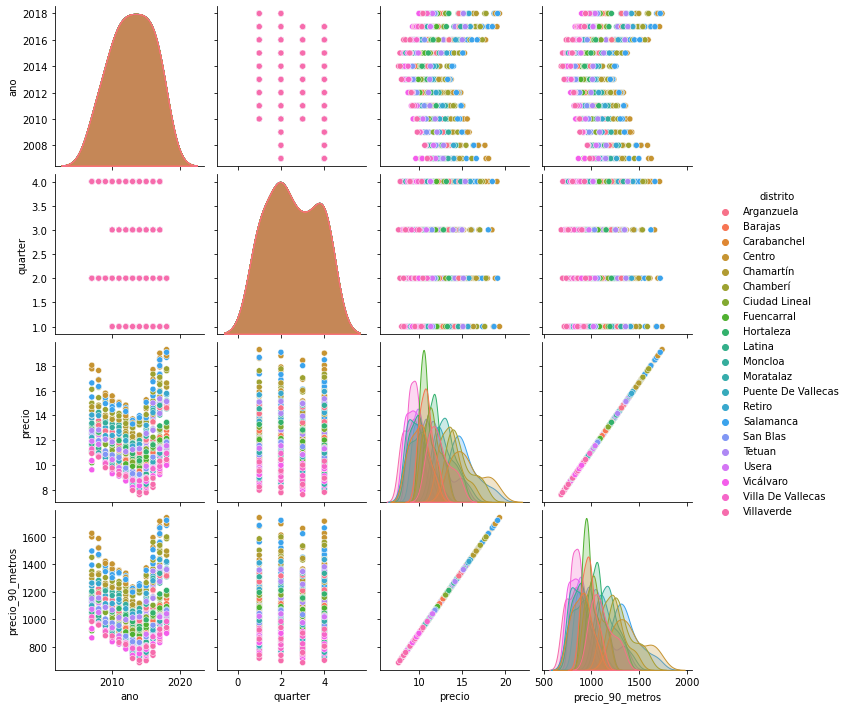

In [188]:
sns.pairplot(alquiler, hue = 'distrito')

In [214]:
import plotly.express as px
from matplotlib import pyplot as plt

In [193]:
px.line(alquiler[alquiler.quarter == 1], x = 'ano', y = 'precio_90_metros', color = 'distrito', title = 'Un gráfico molón')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



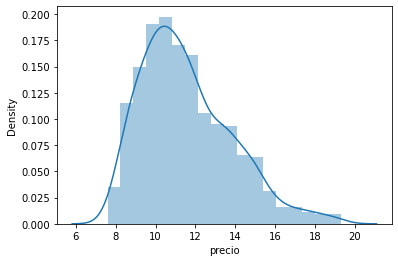

In [195]:
sns.distplot(alquiler.precio)

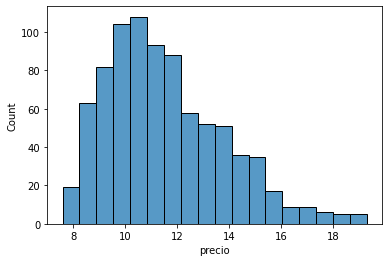

In [196]:
sns.histplot(alquiler.precio, kde = False)

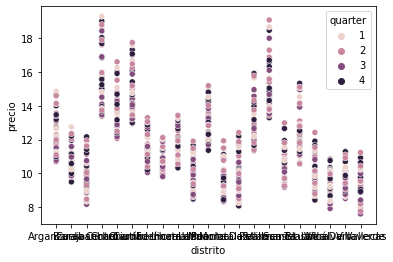

In [218]:
sns.scatterplot(x = 'distrito', y = 'precio', data = alquiler, hue = 'quarter')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



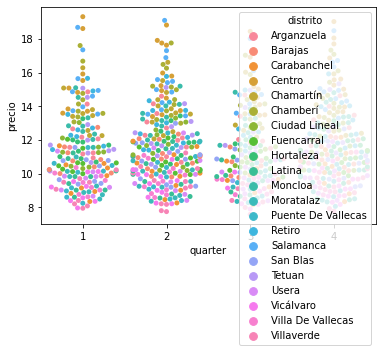

In [222]:
sns.swarmplot(x = 'quarter', y = 'precio', data = alquiler, hue = 'distrito')

#### Ejercicio

* Carga en un DataFrame el CSV `dat/venta-madrid-distritos.csv`
* Crúzalo con el que ya tenemos de alquiler. El objetivo es tener, para cada distrito, año y cuatrimestre, tanto el precio de alquiler como el de venta del metro cuadrado. Para saber cómo poner sufijos a las columnas que colisionan en el cruce, mira la documentación de `merge`.
* Extrae los precios medios de venta y alquiler por distrito para todo el histórico
* Exporta el resultado a csv
* Extrae, para el año y cuatrimestre más reciente del que haya datos, el distrito donde es más rentable comprar una vivienda para destinarla a alquiler. Es decir, con el ratio precio alquiler / precio venta más alto.


Para exportar a csv se usa la siguiente función con la siguiente sintaxis: df_name.to_csv('fichero.csv', index = False, enconde = 'utf-8'). El index = False es para que no guarde también los índices.